# De Montmort’s Matching Problem

Consider a well-shuﬄed deck of $n$ cards, labeled $1$ through $n$. 

You flip over the cards one by one, saying the numbers 1 through nas you do so. 

You win the game if, at some point, the number
you say aloud is the same as the number on the card being flipped over (for example,
if the 7th card in the deck has the label 7).

What is the probability of winning?

## Solution: 

Let $A_i$ be the event that the $i^{th}$ card in the deck has the number $i$ written on it.

We are interested in the probability of the union $A_1 \cup ... \cup A_n$

To find the probability of the union, we’ll use inclusion-exclusion.

First,

$$
P(A_i) = \frac{1}{n}
$$

Second, 

$$
P(A_i \cap A_j) = \frac{1}{n\times (n-1)}
$$

Lastly we investigate for the third case,

$$
P(A_i \cap A_j \cap A_k) = \frac{1}{n \times (n-1) \times (n-2)}
$$

and the pattern continues for intersections of 4 events, etc.

In the inclusion-exclusion formula, there are $n$ terms involving one event. 

$\binom{n}{2}$ terms involving two event,

$\binom{n}{3}$ terms involving three events... and son. 

Thus we get:

$$
\begin{aligned}
P(A_1 \cup ... \cup A_n) &= n \frac{1}{n} - \binom{n}{2} \frac{1}{n\times (n-1)} + \binom{n}{3} \frac{1}{n \times (n-1) \times (n-2)} - ...
\\ 
\\
&= 1 - \frac{1}{2!} + \frac{1}{3!} - \frac{1}{4!} + ...
\end{aligned}
$$

Now remember the Taylor expansion or Maclaurin expansion of $e^x$

$$
e^x = \sum \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ...
$$

Let $x= -1 $ then we get:

$$
e^{-1} = 1 - 1 + \frac{1}{2!} - \frac{1}{3!} + ...
$$

$$
-e^{-1} = - 1 + 1 - \frac{1}{2!} + \frac{1}{3!} - ...
$$

$$
1 - e^{-1} = 1 - \frac{1}{2!} + \frac{1}{3!} - \frac{1}{4!} + ...
$$

Now compare this result to above probability... Thus we've found out that 

$$
P(A_1 \cup ... \cup A_n) = 1 - e^{-1} \approx 0.6321
$$

Interestingly, as n grows, the probability of winning approaches $1−e^{-1}$ instead of going to $0$ or $1$. 

With a lot of cards in the deck, the number of possible locations for matching cards increases while the probability of any particular match decreases, and these two forces oﬀset each other and balance
to give a probability of about $1-e^{-1}$

---------

# Simulation

In [24]:
import numpy as np
import pandas as pd
from plotnine import * 

In [25]:
np.random.seed(24)
n = 100

index = np.arange(1,n+1)
experiments = np.array([np.random.permutation(np.arange(1,n+1)) for _ in range(1000)])

index_match = (experiments == index)
num_matches = index_match.sum(axis= 1)

print(f'P(at_least_one_match) = {(num_matches > 0).mean()}')

P(at_least_one_match) = 0.63


In [28]:
np.random.seed(2526)
cards = np.arange(1, 1001)
probabilities_based_on_n = []

for n in range(1,1001):
    index = np.arange(1,n+1)
    experiments = np.array([np.random.permutation(np.arange(1,n+1)) for _ in range(1000)])

    index_match = (experiments == index)
    num_matches = index_match.sum(axis= 1)

    probabilities_based_on_n.append( (num_matches > 0).mean())

df = pd.DataFrame({
    'n' : cards,
    'prob' : probabilities_based_on_n
})

df.head()

,n,prob
0,1,1.000
1,2,0.503
2,3,0.678
3,4,0.622
4,5,0.633


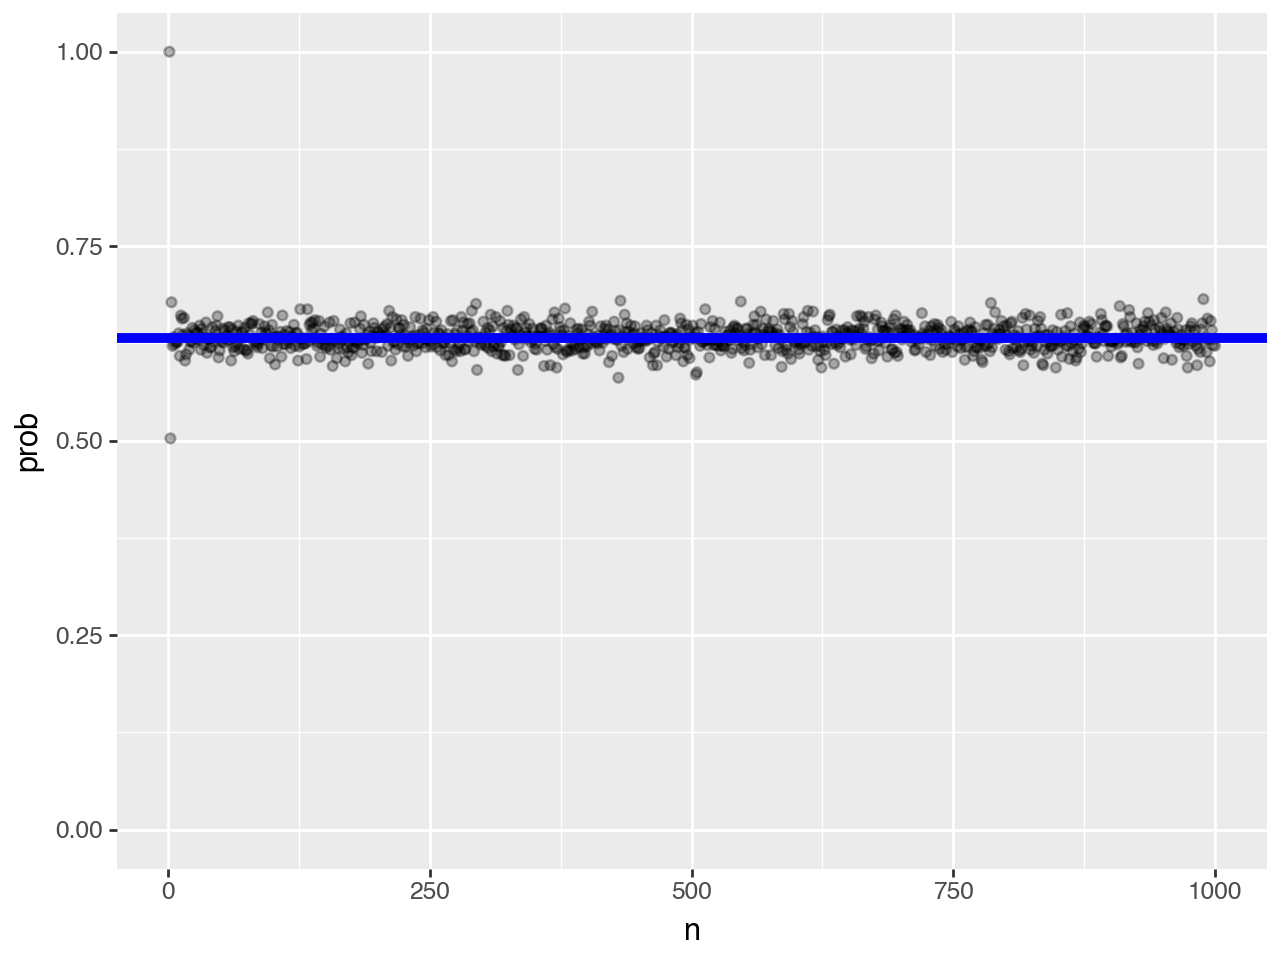

In [39]:
y_i = 1 - np.pow(np.e,-1)

(
    ggplot(df, aes(x = 'n', y = 'prob')) + 
    geom_point(alpha = 0.3) + 
    geom_hline(yintercept = y_i, color = 'blue', size = 2) + 
    ylim(0,1)
)